Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt


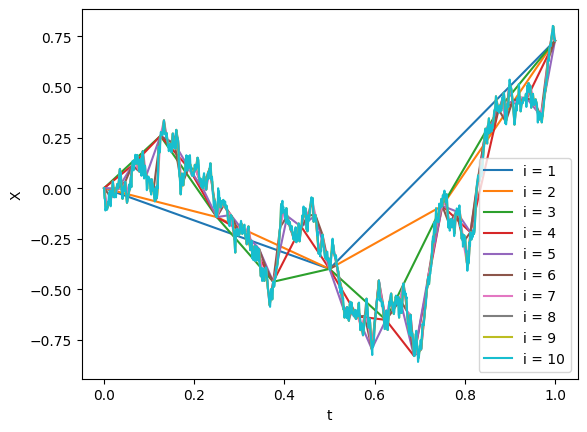

In [13]:
np.random.seed(55) #seed to make plot same every time
# Initializing values
N = 2**10 
h = 1/N
dW = np.zeros(N+1) # empty array which is filled with the Brownian motion

# for loop which finds the brownian motion
for i in range(1, N+1):
    eta = np.random.normal(0, np.sqrt(h), 1)
    dW[i] = dW[i-1] + eta

#for loop which plots each path by resolution
for i in range(1, 11):
    step_size = N // (2**i)
    index = np.arange(0, N+1, step_size)
    plt.plot(np.linspace(0,1, 1+N//step_size), dW[index], label = f'i = {i}')
    
plt.xlabel('t')
plt.ylabel('X')
plt.legend()
plt.show()

Question 2

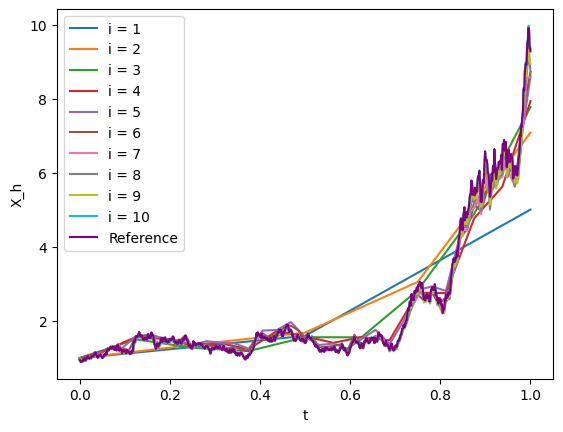

In [14]:
mu = 2 
sigma = 1
np.random.seed(55)
dW = np.zeros(N+1)

X_br = []
for i in range(1, N+1):
    eta = np.random.normal(0, np.sqrt(h), 1)
    dW[i] = dW[i-1] + eta
    X_br.append(np.exp((mu-sigma**2/2)*(i/(N+1))+sigma*dW[i]))
t = np.linspace(0 , 1, N)

for i in range(1, 11):
    n = 2**i
    h = 1/n
    Nr = n +1
    X_h = np.zeros(Nr)
    X_h[0] = 1
    index = np.arange(0, 1+h, h)
    for j in range(1, Nr):
        X_h[j] = (1+h*mu)*X_h[j-1] + sigma*X_h[j-1]*(dW[int((j)*(2**10)/n)]-dW[int((j-1)*(2**10)/n)])
    plt.plot(index, X_h, label = f'i = {i}') 

plt.plot(t, X_br, c = 'purple', label = 'Reference')
plt.xlabel('t')
plt.ylabel('X_h')
plt.legend()
plt.show()

Question 3

In [212]:
M = 1000
N = 2**10
h_1 = 1/N
np.random.seed(12)

def ref(t):
    return np.exp((mu-sigma**2/2)*t+sigma*dW[int((t)*(2**10))])

plt_errors = []
for k in range(1, 11):
    str_errors = 0
    n = 2**k
    h = 1/n
    for i in range(M):
        dW = np.zeros(N+1)
        for i in range(1, N+1):
            eta = np.random.normal(0, np.sqrt(h_1), 1)
            dW[i] = dW[i-1] + eta
        
        final_reference = ref(1)
        
        X_h = np.zeros(N+1)
        X_h[0] = 1
        for j in range(1, n+1):
            X_h[j] = (1+h*mu)*X_h[j-1] + sigma*X_h[j-1]*(dW[int((j)*(2**10)/n)]-dW[int((j-1)*(2**10)/n)])
            
        str_errors = str_errors + (final_reference-X_h[n])**2
    plt_errors.append(np.sqrt(str_errors/M))



In [209]:
print(plt_errors)

[8.316288655390265, 6.392166856690234, 4.975520660003187, 2.786001168645253, 1.7703948249272843, 1.737708689969138, 0.8108699811525988, 0.602630874687904, 0.3359247251437713, 0.23153379550868705]


[7.137603209028464, 6.086189653455726, 5.147249155102542, 2.461525359908115, 1.7647468332873213, 1.201065285915563, 0.6530256883671698, 0.5342171782529677, 0.3867215860424758, 0.25299547803058686]


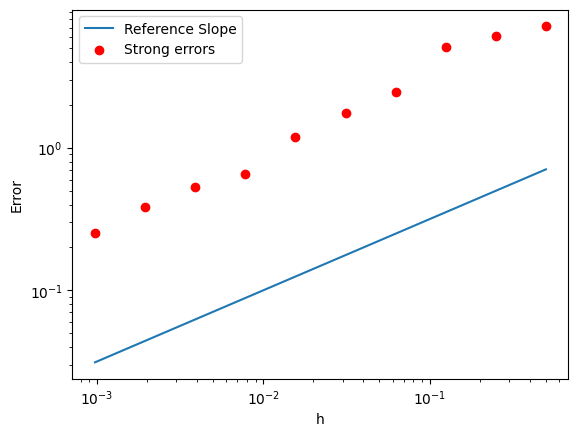

In [218]:
print(plt_errors)
h_index = []
ref_slope = []
for i in range(1,11):
    h_index.append(2**(-i))
    ref_slope.append(np.sqrt(2**(-i)))

plt.loglog(h_index, ref_slope, label = 'Reference Slope')
plt.scatter(h_index, plt_errors, label = 'Strong errors', marker = 'o', c = 'red')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

Question 4

In [196]:
M = 1000
N = 2**10
h_1 = 1/N
E_1 = np.exp(mu)
np.random.seed(12)

expect1 = np.zeros(0)
E_X = np.zeros(10)

for i in range(M):
    dW = np.zeros(N+1)
    eta = np.random.normal(0, np.sqrt(h), N+1)
    for i in range(1, N+1):
        dW[i] = dW[i-1] + eta[i]
    
    xh = []
    for i in range(1, 11):
        n = 2**i
        h = 1/n
        Nr = n +1
        X_h = np.zeros(Nr)
        X_h[0] = 1
        for j in range(1, Nr):
            X_h[j] = (1+h*mu)*X_h[j-1] + sigma*X_h[j-1]*(dW[int((j)*(2**10)/n)]-dW[int((j-1)*(2**10)/n)])
        xh.append(X_h[n])
    E_X = E_X + xh
expect1 = (np.abs(E_1 - E_X/M))

In [197]:
h_index = []
for i in range(1,11):
    h_index.append(6*2**(-i))

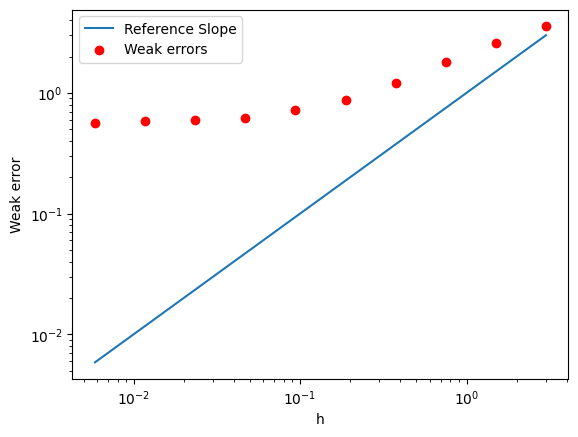

In [198]:
plt.loglog(h_index, h_index, label = 'Reference Slope')
plt.scatter(h_index, expect1, label = 'Weak errors', marker = 'o', c = 'red')
plt.xlabel('h')
plt.ylabel('Weak error')
plt.legend()
plt.show()

Question 5

In [205]:
M = 1000
N = 2**10
h_1 = 1/N
E_1 = np.exp(2*mu+sigma**2)

def test(x):
    return x**2

np.random.seed(12)

expect = np.zeros(10)
E_X = np.zeros(10)

for i in range(M):
    dW = np.zeros(N+1)
    eta = np.random.normal(0, np.sqrt(h), N+1)
    for i in range(1, N+1):
        dW[i] = dW[i-1] + eta[i]
    
    xh = []
    for i in range(1, 11):
        n = 2**i
        h = 1/n
        Nr = n +1
        X_h = np.zeros(Nr)
        X_h[0] = 1
        for j in range(1, Nr):
            X_h[j] = (1+h*mu)*X_h[j-1] + sigma*X_h[j-1]*(dW[int((j)*(2**10)/n)]-dW[int((j-1)*(2**10)/n)])
        xh.append(X_h[n]**2)
    E_X = E_X + xh
expect = (np.abs(E_1 - E_X/M))


In [206]:
h_index = []
for i in range(1,11):
    h_index.append(200*2**(-i))

[129.53336103 113.10948499  90.50654374  65.76460325  50.88980982
  40.14147851  31.90289199  30.58620817  29.37651934  29.07909478]


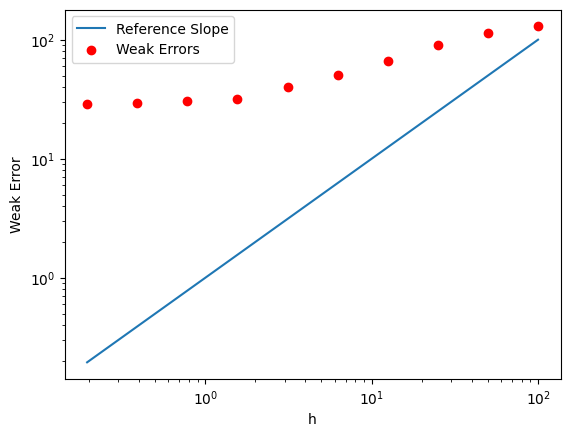

In [207]:
print(expect)
plt.loglog(h_index, h_index, label = 'Reference Slope')
plt.scatter(h_index, expect, label = 'Weak Errors', marker = 'o', c = 'red')
plt.xlabel('h')
plt.ylabel('Weak Error')
plt.legend()
plt.show()